**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Procesamiento del Lenguaje Natural** 

***
Datos del alumno (Nombre y Apellidos): Victor Eduardo Anchondo Trejo

Fecha: 14/Febrero/2022
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Actividad 2: Análisis sintáctico</span>

**Objetivos** 

Con esta actividad se pretende implementar el algoritmo CKY probabilístico y aplicarlo para realizar el análisis sintáctico automático de una oración.

**Pautas de elaboración**

El algoritmo CKY probabilístico usa una gramática libre de contexto probabilístico. La gramática que se va a usar en esta actividad se encuentra en formato CNF (Chomsky Normal Form) y está compuesta de reglas que tienen asociada la correspondiente probabilidad de que se use la regla durante el análisis de una oración.

La gramática se define como sigue:
```
G = (T, N, R, S)
Conjunto de terminales: T = {time, flies, arrow, an, like}
Conjunto de no terminales: N = {S, NP, VP, PP, Det, Nominal, Verb, Preposition, Noun}
Conjunto de reglas:
R={
  S → NP VP                       0.800
  NP → time | flies | arrow       0.002
  NP → Det Nominal                0.300
  NP → Nominal Nominal            0.200
  Nominal → time | flies | arrow  0.002
  Nominal → Nominal Noun          0.100
  Nominal → Nominal PP            0.200
  VP → time                       0.004
  VP → flies | like               0.008
  VP → Verb NP                    0.300
  VP → Verb PP                    0.200
  PP → Preposition NP             0.100
  Verb → time                     0.010
  Verb → flies | like             0.020
  Noun → time | flies | arrow     0.010
  Det → an                        0.050
  Preposition → like              0.050
}
```

*Axioma de la gramática: S*

Se debe realizar el análisis sintáctico de la frase:

> *Time flies like an arrow*

**Paso 1. Implementar en Python la estructura de la matriz de análisis sintáctico (CKY).**

**Paso 2. Implementar en Python la representación de la gramática proporcionada.**

In [106]:
'''
Esta clase se utilizará para el manejo de la estructura de la gramática.
La propiedad elementos es una lista de los elementos que tiene la regla. 
  Por ejemplo: ["Verb", "PP"]
La propiedad valor es el valor de la probabilidad que tiene la regla.
'''
class ElementoGramatica:    
    def __init__(self, elementos, valor):
        self._elementos = elementos
        self._valor = valor
    
    @property
    def elementos(self):
        return self._elementos
    @property
    def valor(self):
        return self._valor

In [107]:
'''
R es un diccionario de las reglas de la gramatica, que tiene una key y un 
objeto de tipo ElementoGramatica el cual contiene los elementos de una
regla y su valor de probabilidad.
'''
R = {
    "S": [ElementoGramatica(["NP", "VP"], .800)],
    
    "NP": [ElementoGramatica(["time", "flies", "arrow"], .002),
           ElementoGramatica(["Det", "Nominal"], .300),
           ElementoGramatica(["Nominal", "Nominal"], .200)],
    
    "Nominal": [ElementoGramatica(["time", "flies", "arrow"], .002),
                ElementoGramatica(["Nominal", "Noun"], .100),
                ElementoGramatica(["Nominal", "PP"], .200)],
    
    "VP": [ElementoGramatica(["time"], .004),
           ElementoGramatica(["flies", "like"], .008),
           ElementoGramatica(["Verb", "NP"], .300),
           ElementoGramatica(["Verb", "PP"], .200)],
    
    "PP": [ElementoGramatica(["Preposition", "NP"], .100)],
    
    "Verb": [ElementoGramatica(["time"], .010),
             ElementoGramatica(["flies", "like"], .020)],
    
    "Noun": [ElementoGramatica(["time", "flies", "arrow"], .100)],
    
    "Det": [ElementoGramatica(["an"], .050)],
    
    "Preposition": [ElementoGramatica(["like"], .050)],
}


**Paso 3. Implementar en Python el algoritmo CKY probabilístico.**

In [108]:
'''
Esta clase se utiliza para representar la matriz para el reconocimiento 
sintactico cada objeto de tipo Nodo es el equivalente a cada celda de la
matriz.
'''
class Nodo:
    def __init__(self, raiz, izquierda, derecha, terminal, valor):
        self._raiz = raiz
        self._izquierda = izquierda
        self._derecha = derecha
        self._terminal = terminal
        self._valor = valor
            
    @property
    def raiz(self):
        return self._raiz
    
    @property
    def izquierda(self):
        return self._izquierda
    
    @property
    def derecha(self):
        return self._derecha
    
    @property
    def terminal(self):
        return self._terminal
    
    @property
    def valor(self):
        return self._valor

    def __str__(self):
      return "(%s - %.15f)" % (self._raiz, self._valor)

In [109]:
'''
Esta funcion es para realizar el algoritmo de CKY
Recibe como parametro el enunciado, el cual es una lista de strings donde cada
string es una palabra del enunciado.
'''
def algoritmoCKY(enunciado):
    # Se obtiene el numero de palabras que tiene el enunciado
    n = len(enunciado)
    
    # Inicializa una matriz de tamaño (n+1) x (n+1) donde n es el numero de palabras que tiene el enunciado
    tabla = [[[] for i in range(n+1)] for j in range(n+1)]
    # Inicializa una matriz de tamaño (n+1) x (n+1) donde n es el numero de palabras que tiene el enunciado
    matrizNodos = [[[] for i in range(n+1)] for j in range(n+1)]
    
    # Itera por cada palabra del enunciado, n = total de palabras
    for j in range(1, n+1):
        # Asinamos palabra actual con enunciado[j-1]
        palabraActual = enunciado[j-1]
        # Itera las reglas que tenemos definidas en R por medio de la key del diccionario (S, NP, Nominal, etc...)
        for r in R:
            # Obtiene la regla del indice 'R' junto con la lista de 'ElementoGramatica'
            regla = R[r]
            # Se itera la lista de 'ElementoGramatica'
            for listaElementos in regla:
                # Verifica si la palabraActual esta dentro de listaElementos.elementos
                if palabraActual in listaElementos.elementos:
                    # Agregamos r (key) a tabla en la posicion[j-1][j]
                    tabla[j-1][j].append(r)
                    # Agregamos el Nodo con el valor de r (key), palabraActual y el valor de la regla a la matriz de nodos
                    matrizNodos[j-1][j].append(Nodo(r, None, None, palabraActual, listaElementos.valor))

        # Despues de iterar todas las reglas para una palabra, se recorre la tabla en diagonal y se 
        # llenan los campos usando las reglas de la gramatica.
        # La iteracion se hace en reversa, utilizando como valor inicial j-1 (indice de la palabra actual)
        # Va de abajo hacia arriba
        for i in reversed(range(0, j-1)):
            # Esta iteracion inicia en el valor de i+1, valor del indice del ciclo anterior + 1, esto para
            # recorrer la tabla en diagonal y finaliza en j (indice de la palabra actual + 1)
            for k in range(i+1, j):
                # Itera las reglas que tenemos definidas en R por medio de la key del diccionario (S, NP, Nominal, etc...)
                for r in R:
                    # Obtiene la regla del indice 'R' junto con la lista de 'ElementoGramatica'
                    for regla in R[r]:
                        # Verifica que la lista de elementos tenga por lo menos un tamaño de 2
                        # Esto para luego verificar si estos elementos se encuentran en la tabla
                        if len(regla.elementos) == 2:
                            # Se leen los 2 elementos de la regla
                            B = regla.elementos[0]
                            C = regla.elementos[1]

                            # Verifica si B esta dentro de tabla[i][k]
                            # y si C esta dentro de tabla[k][j]
                            if B in tabla[i][k] and C in tabla[k][j]:
                                # Agregamos r (key) a tabla en la posicion[i][j]
                                tabla[i][j].append(r)
                                
                                # Iteramos los nodos que esten dentro de matrizNodos[i][k]
                                for b in matrizNodos[i][k]:
                                    # Iteramos los nodos que esten dentro de matrizNodos[k][j]
                                    for c in matrizNodos[k][j]:
                                        # Verificamos si la raiz de b es igual a B y la raiz de c es igual a C
                                        if b.raiz == B and c.raiz == C:
                                            # Si llega hasta aqui significa que tenemos un match entonces agregamos el
                                            # un nodo nuevo en matrizNodos[i][j] que tiene el valor de r=raiz, b=izquierda,
                                            # c=derecha y el valor es calculado utilizando b.valor * c.valor * regla.valor
                                            matrizNodos[i][j].append(Nodo(r, b, c, None, b._valor * c._valor * regla.valor))

    return matrizNodos

**Paso 4. Aplicar el algoritmo a la frase que se quiere analizar usando la matriz tabla, operando por columnas de abajo arriba y de izquierda a derecha. Para cada celda se deben determinar los constituyentes sintácticos posibles y calcular sus probabilidades.**

In [110]:
'''
Funcion para imprimir la tabla completa
'''
def imprimirTabla(tabla):
    for i in range(0, len(tabla) - 1):
        print("### Fila %d ###" % i)  
        for j in range(1, len(tabla)):
            celda = ""
            for nodo in tabla[i][j]:
                celda+=(str(nodo) + ", ")

            if celda == "": 
                celda = "N/A"
            else:
                celda = celda[:-2] # borra la coma y el espacio del final
            print("[%1d,%1d] = {%s}" % (i, j, celda))
        print("")

In [111]:
# Enunciado/Frase a probar
enunciado = "Time flies like an arrow"

# Se convierten todas las letras a minusculas y se aplica la funcion split() al enunciado para partirlo en una lista de strings
listaPalabras = enunciado.lower().split()

# Se aplica el algoritmoCKY al enunciado y obtenemos la tabla con sus probabilidades
tabla = algoritmoCKY(listaPalabras)

# Se imprime toda la tabla
print("######### Tabla de probabilidades #########\n")
imprimirTabla(tabla)

######### Tabla de probabilidades #########

### Fila 0 ###
[0,1] = {(NP - 0.002000000000000), (Nominal - 0.002000000000000), (VP - 0.004000000000000), (Verb - 0.010000000000000), (Noun - 0.100000000000000)}
[0,2] = {(S - 0.000012800000000), (NP - 0.000000800000000), (Nominal - 0.000020000000000), (VP - 0.000006000000000)}
[0,3] = {(S - 0.000000005120000)}
[0,4] = {N/A}
[0,5] = {(S - 0.000000000000960), (NP - 0.000000000000024), (S - 0.000000000000115), (Nominal - 0.000000000000600)}

### Fila 1 ###
[1,1] = {N/A}
[1,2] = {(NP - 0.002000000000000), (Nominal - 0.002000000000000), (VP - 0.008000000000000), (Verb - 0.020000000000000), (Noun - 0.100000000000000)}
[1,3] = {(S - 0.000012800000000)}
[1,4] = {N/A}
[1,5] = {(S - 0.000000000288000), (Nominal - 0.000000000060000), (VP - 0.000000000600000)}

### Fila 2 ###
[2,1] = {N/A}
[2,2] = {N/A}
[2,3] = {(VP - 0.008000000000000), (Verb - 0.020000000000000), (Preposition - 0.050000000000000)}
[2,4] = {N/A}
[2,5] = {(VP - 0.000000180000000), (PP

**Nota:** tomar decisiones sobre cómo implementar el contenido de las celdas para poder aplicar el cálculo de la ruta de Viterbi más probable.

**Paso 5. Implementar el algoritmo para el cálculo de la ruta de Viterbi más probable. Como resultado se debe obtener el árbol de análisis sintáctico más probable.**

In [112]:
'''
Esta funcion recursiva para construir el arbol a partir de la raiz proporcionada
Utiliza la identacion para identar los nodos y se pueda tener una visualizacion
mas amigable 
'''
def construirArbol(raiz, indentacion):
		if raiz._terminal != None:
				return '(%s %s %.5f)' % (raiz.raiz, raiz.terminal, raiz._valor)

	
		# Se calcula la nueva identacion para los siguientes nodos
		identacionIzq = indentacion + 2 + len(raiz.izquierda.raiz)
		identacionDer = indentacion + 2 + len(raiz.derecha.raiz)

		# Se construyen los arboles hijos de la izquierda y derecha
		izquierda = construirArbol(raiz.izquierda, identacionIzq)
		derecha = construirArbol(raiz.derecha, identacionDer)
	
		return '(%s %s\n' % (raiz.raiz, izquierda) + ' '*indentacion + derecha + ')'

def imprimirArbolesPosibles(listaFinalNodos):
		for nodo in listaFinalNodos:
				if nodo.raiz == 'S':
						print("S({:.15f})".format(nodo._valor))
						print(construirArbol(nodo, 3) + "\n")

def imprimirArbolMasProbable(listaFinalNodos):
    encontrado = False
    nodoMasProbable = Nodo(None, None, None, None, -1)
    
    for nodo in listaFinalNodos:
        if nodo.raiz == 'S' and nodo._valor > nodoMasProbable._valor:
            nodoMasProbable = nodo
            encontrado = True
    
    if encontrado:
        print("S({:.15f})".format(nodoMasProbable._valor))
        print(construirArbol(nodoMasProbable, 3))
    else:
        print('El enunciado no es valido segun la gramatica')

In [113]:
listaFinalDeNodos = tabla[0][len(listaPalabras)]
print("######### Arboles posibles #########")
imprimirArbolesPosibles(listaFinalDeNodos)

print("######### Arboles mas probable #########")
imprimirArbolMasProbable(listaFinalDeNodos)

######### Arboles posibles #########
S(0.000000000000960)
(S (NP time 0.00200)
   (VP (Verb flies 0.02000)
       (PP (Preposition like 0.05000)
           (NP (Det an 0.05000)
               (Nominal arrow 0.00200)))))

S(0.000000000000115)
(S (NP (Nominal time 0.00200)
       (Nominal flies 0.00200))
   (VP (Verb like 0.02000)
       (NP (Det an 0.05000)
           (Nominal arrow 0.00200))))

######### Arboles mas probable #########
S(0.000000000000960)
(S (NP time 0.00200)
   (VP (Verb flies 0.02000)
       (PP (Preposition like 0.05000)
           (NP (Det an 0.05000)
               (Nominal arrow 0.00200)))))


Por último, se debe reflexionar sobre los resultados obtenidos, interpretarlos y analizar el rendimiento de aplicar el algoritmo CKY probabilístico para realizar el análisis sintáctico y sus limitaciones. Para ello se debe responder de forma razonada a las siguientes preguntas:

**¿Es correcto el análisis sintáctico que se ha obtenido?**

Me parece que si es correcto, ya que los resultados que fue obteniendo durante la ejecucion (tabla de probabilidades y arboles probables) resultaron iguales a los que yo obtuve durante mi analisis en papel.

En este resultado me da 2 arboles posibles
1. Este es el mas probable

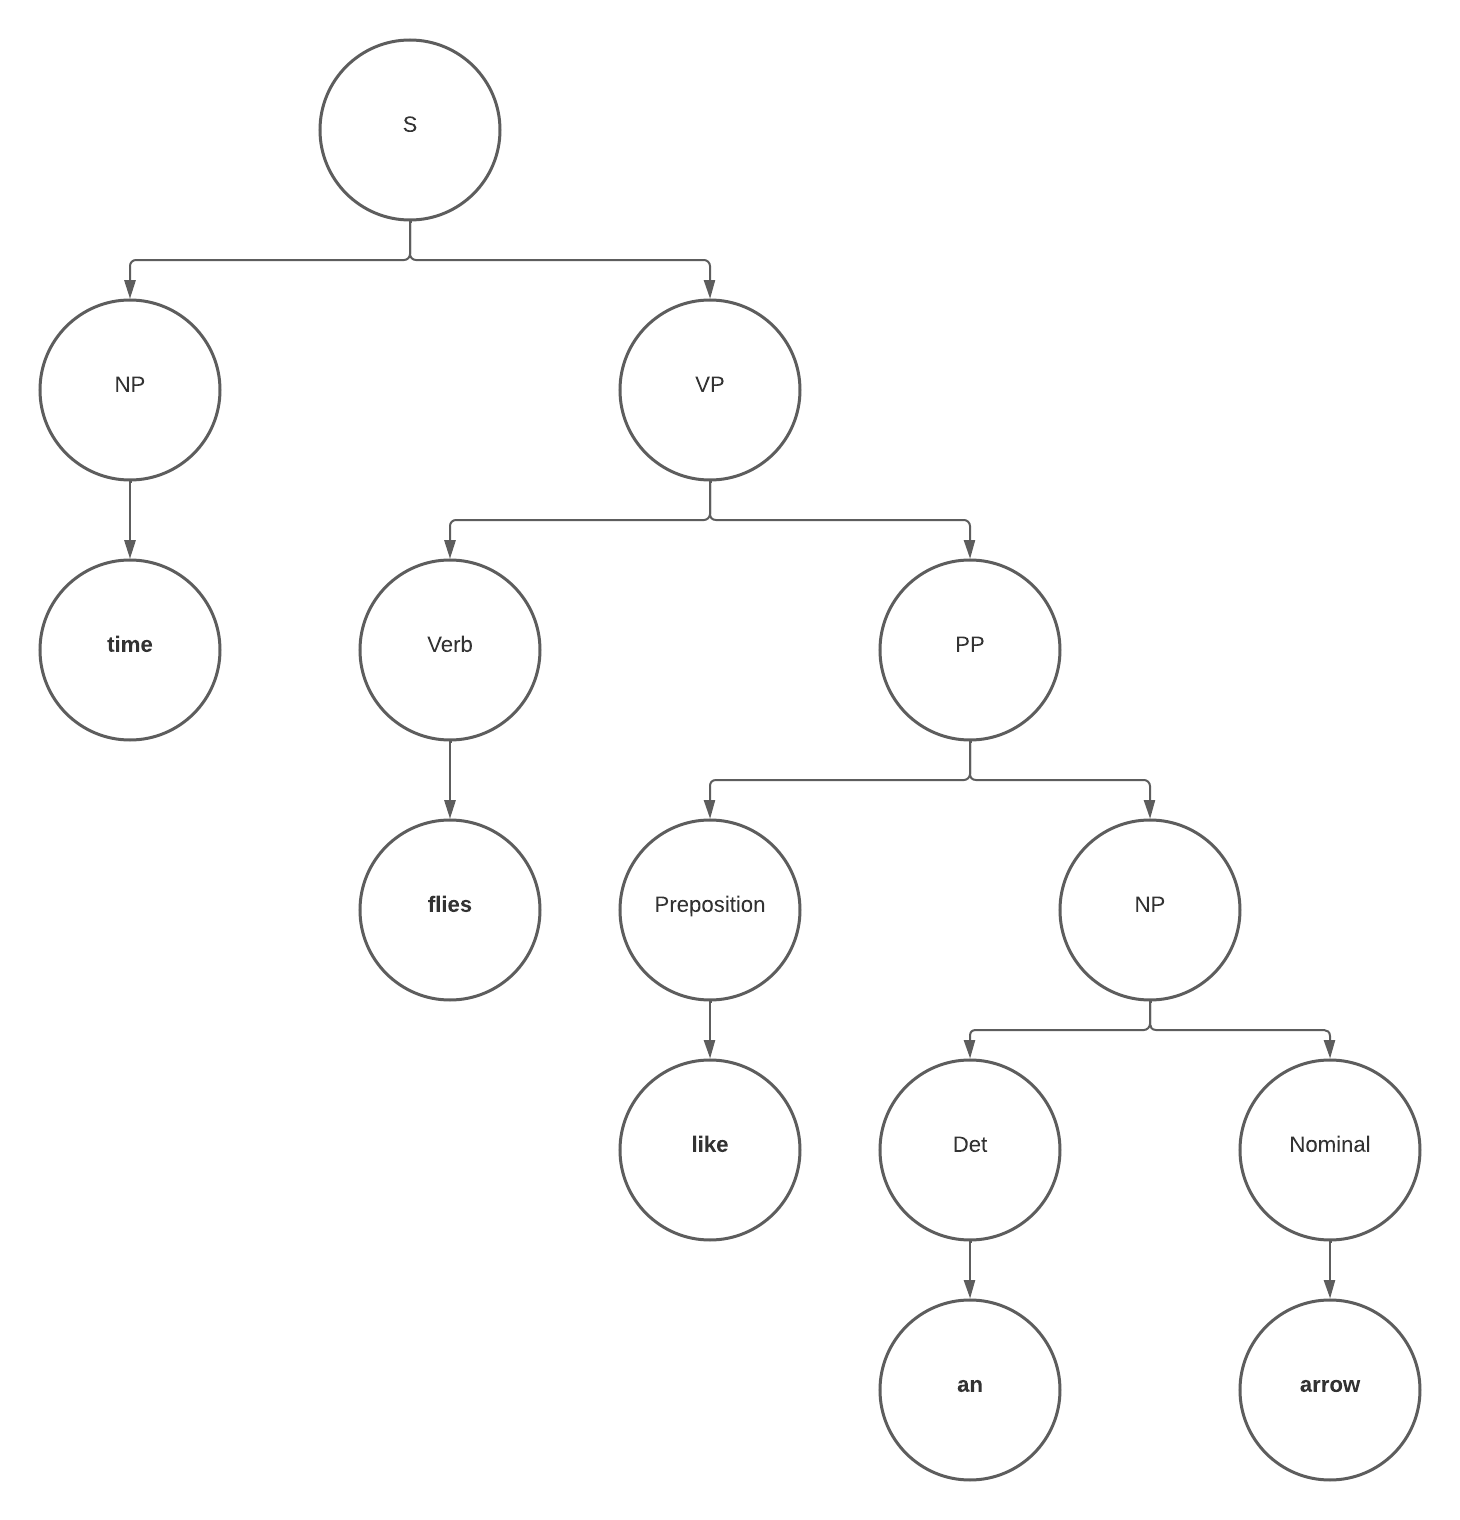

2. Arbol posible

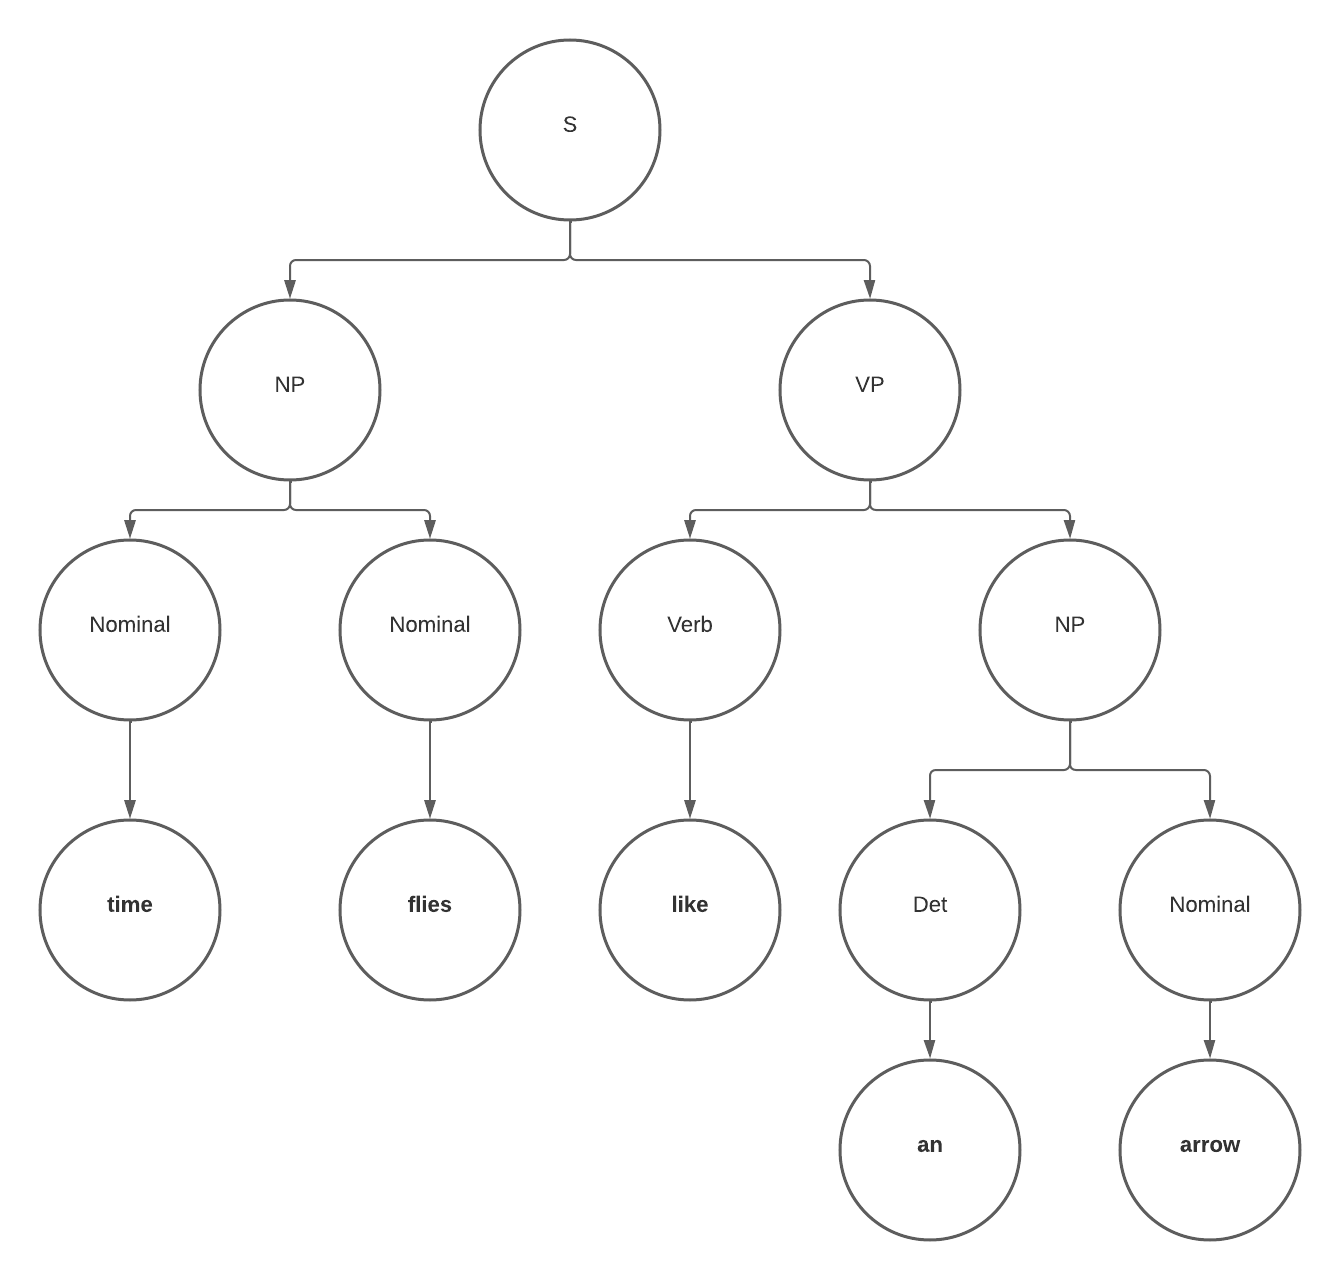


**¿Cuáles son las limitaciones de aplicar el algoritmo CKY probabilístico para realizar el análisis sintáctico?**

Las principales limitaciones que veo es que esta completamente acoplado a la gramatica que se provee.

En caso de utilizar enunciados que no son soportados por esta gramatica el algoritmo clasificara los enunciados como no validos, por ejemplo si se quiere analizar frases que dicen los niños de primaria, secundaria, preparatoria o nivel licenciatura, estas frases tendran una estructura muy diferente y eso sin contar la region donde vivan o el nivel socio-economico.

Entiendo que la fuente o la base de datos para la gramatica se puede enriquecer y crecer para poder ser mas flexible pero esto tambien nos lleva a que necesitariamos un mayor poder de computo para poder mantener y analizar frases a esta escala.



**¿Qué posibles mejoras que se podrían aplicar para mejorar el rendimiento del análisis sintáctico?**

Creo que se podrian hacer muchas mejoras al algoritmo que implemente, ya que python no es el lenguaje que mas domino, en primera creo que podria hacer un uso mas exhaustivo de diccionarios en vez de tablas/matrices para poder acceder directamente a los elementos dentro de ella (segun recuerdo, lei que python tiene un mejor manejo de memoria con los diccionarios que con los arrays).

Otra mejora que creo que puede ser posible es el tratar de reducir la complejidad de las funciones que son de tipo O(n^2) ya que estas mismas harian que el tiempo de procesamiento aumente exponenencialmente segun el tamaño de la gramatica y el numero de palabras en el enunciando a procesar.

Y para tener una visualizacion mas amigable de los resultados, se podria hacer uso de alguna libreria para generar reportes, tablas, grafos y de esta manera presentar los resultados de una manera mas amena para el usuario.

In [114]:
# Convierte el notebook en HTML para despues convertirlo en PDF y se vea un poco mejor
!jupyter nbconvert --to html /content/drive/MyDrive/Documents/UNIR/ProcesamientoDelLenguajeNatural/Actividad_2/actividad02_analisisSintactico.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Documents/UNIR/ProcesamientoDelLenguajeNatural/Actividad_2/actividad02_analisisSintactico.ipynb to html
[NbConvertApp] Writing 407735 bytes to /content/drive/MyDrive/Documents/UNIR/ProcesamientoDelLenguajeNatural/Actividad_2/actividad02_analisisSintactico.html
